In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [36]:
#loading the dataset
df = pd.read_excel(r"C:\Users\PC\Desktop\6 projects\monthly-milk-production-pounds-p.xlsx")

In [37]:
#gaining insights on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 2 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Month                                                     169 non-null    object 
 1   Monthly milk production: pounds per cow. Jan 62 ? Dec 75  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [38]:
#renaming the column name
df.rename(columns={'Monthly milk production: pounds per cow. Jan 62 ? Dec 75':'Monthly Milk Production'},inplace=True)

In [39]:
#checking for null values
df.isnull()

,Month,Monthly Milk Production
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
165,False,False
166,False,False
167,False,False
168,True,True


In [40]:
#dropping null values
df.dropna(inplace=True)

In [41]:
#checking for null values after dropping null
df.isnull()

,Month,Monthly Milk Production
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
163,False,False
164,False,False
165,False,False
166,False,False


In [42]:
#checking for duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
163    False
164    False
165    False
166    False
167    False
Length: 168, dtype: bool

In [43]:
#converting month column to datetime
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

In [44]:
#setting index to month
df.set_index('Month', inplace=True)

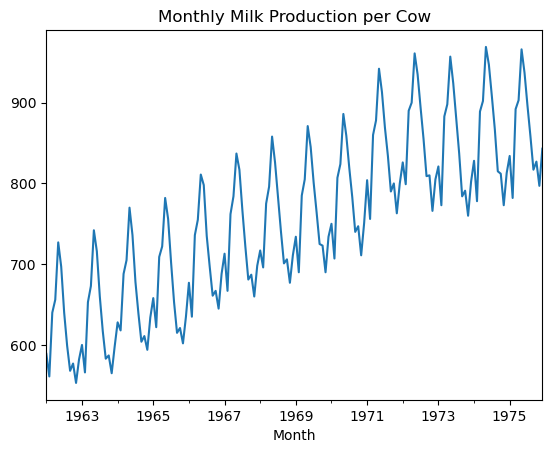

<Figure size 640x480 with 0 Axes>

In [45]:
#visualizing the data to gain more insights
df['Monthly Milk Production'].plot(title='Monthly Milk Production per Cow')
plt.show()
plt.savefig('Monthly Milk Production.png')

<Figure size 640x480 with 0 Axes>

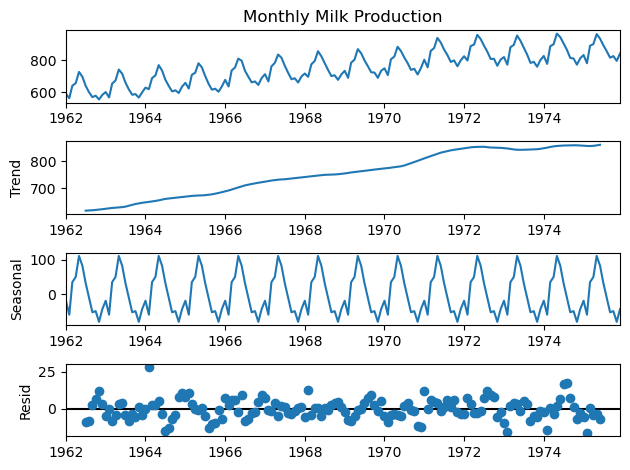

In [46]:
#cheecking seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose
seea = seasonal_decompose(df['Monthly Milk Production'], model='additive')
plt.savefig('Monthly Milk Production99.png')
seea.plot()
plt.show()

In [47]:
#checking p value and adf of the data
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Monthly Milk Production'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -1.303812
p-value: 0.627427


In [48]:
#We need to transform the data to achieve stationarity before proceeding with model fitting.

C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


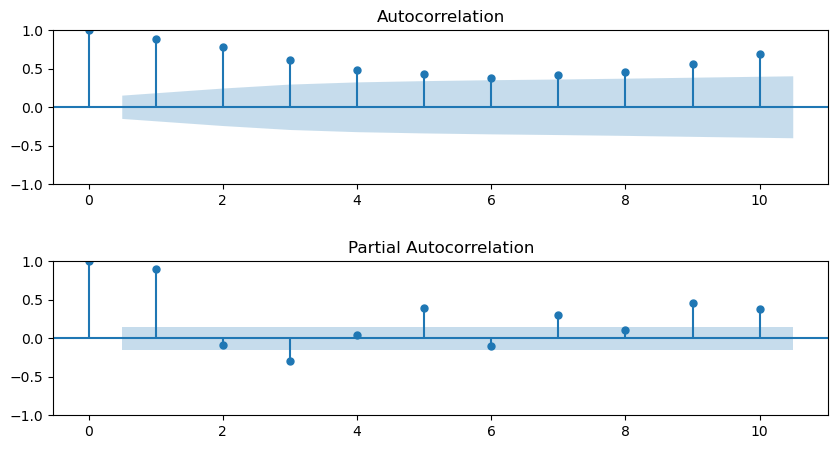

In [51]:
#plotting acf and pacf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = False, sharey = False, figsize = (10, 5))
ax1 = plot_acf(df['Monthly Milk Production'], lags = 10, ax = ax1)
ax2 = plot_pacf(df['Monthly Milk Production'], lags = 10, ax = ax2)
plt.subplots_adjust(hspace = 0.5)
plt.savefig('ACF & PACF.png')
plt.show()

In [55]:
#function to check adf
def adf (time_series):
    result = adfuller (time_series)
    print ('Augmented Dickey Fuller Test :')
    labels = ['ADF Test Statistics', 'P Value', 'Number of Lags Used','Number of Observations']
    for value, label in zip(result, labels):
        print (label +' : '+ str (value))
    if result [1] <= 0.05:
        print ('Strong evidence, REJECT null hypothesis and the series is Stationary ')
    else:
        print ('Weak evidence , hence ACCEPT null hypothesis and the series is Not Stationary ')

In [54]:
df_new = df.diff().diff(12).dropna()

In [56]:
#checking adf and p value of new df

adf(df_new['Monthly Milk Production'])

Augmented Dickey Fuller Test :
ADF Test Statistics : -5.0380022749219915
P Value : 1.865423431878764e-05
Number of Lags Used : 11
Number of Observations : 143
Strong evidence, REJECT null hypothesis and the series is Stationary 


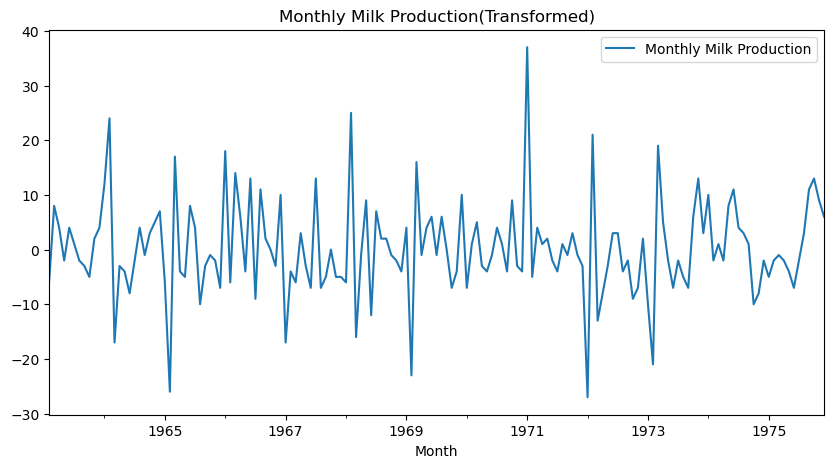

In [58]:
#plotting new transformed data

df_new.plot(figsize =(10, 5))
plt.title('Monthly Milk Production(Transformed)')
plt.savefig('Monthly Milk Production(Transformed).png')
plt.show()

In [59]:
#implementing auto arima model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from pmdarima import auto_arima
model = auto_arima(df['Monthly Milk Production'], d = 1, D = 1, seasonal = True, m = 12, max_order = 6,
                     start_p = 0, start_q = 0, test = 'adf', trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1074.131, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1119.969, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1081.584, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1066.296, Time=0.13 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1114.995, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1068.030, Time=0.21 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1067.976, Time=0.28 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1082.123, Time=0.07 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.99 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1072.280, Time=0.08 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1068.064, Time=0.21 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1067.796, Time=0.17 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1066.207, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1114.845, Time=0.03 sec
 ARIMA(1,1,0)(1,1,1)[12]

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -530.104
Date:                              Fri, 24 May 2024   AIC                           1066.207
Time:                                      15:22:58   BIC                           1075.337
Sample:                                  01-01-1962   HQIC                          1069.916
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2253      0.077     -2.925      0.003      -0.376      -0.074
ma.S.L12      -0.6190      0.070     -8.825      0.000      -0.757      -0.482
sigma2        52.6908      4.897     10.759      0.000      43.093      62.289
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                35.11
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.74
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
#defining train and test data
train = df[:int(0.85*len(df))]
test = df[int(0.85*len(df)):]

train.shape, test.shape

((142, 1), (26, 1))

In [62]:
#implementing SARIMAX model
model = SARIMAX(train['Monthly Milk Production'], order = (1,1,0), seasonal_order = (0,1,1,12))
result = model.fit()
result.summary()

C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Monthly Milk Production   No. Observations:                  142
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -445.603
Date:                              Fri, 24 May 2024   AIC                            897.205
Time:                                      15:25:05   BIC                            905.785
Sample:                                  01-01-1962   HQIC                           900.691
                                       - 10-01-1973                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2728      0.087     -3.149      0.002      -0.443      -0.103
ma.S.L12      -0.6158      0.086     -7.163      0.000      -0.784      -0.447
sigma2        56.0243      5.765      9.719      0.000      44.726      67.323
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                40.04
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.86
Prob(H) (two-sided):                  0.71   Kurtosis:                         5.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

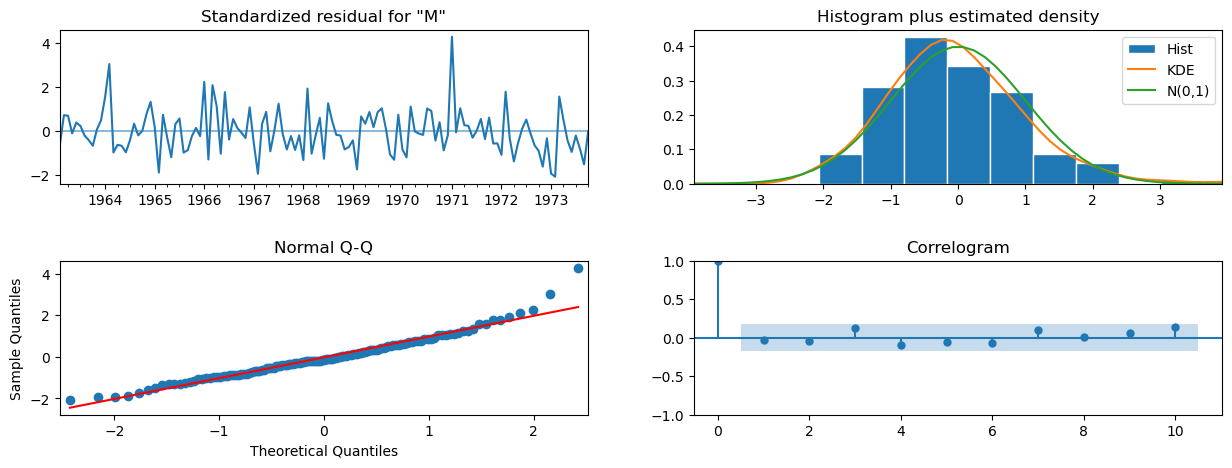

In [63]:
#checking out the best model

result.plot_diagnostics(figsize = (15,5))
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Best model.png')
plt.show()

In [65]:
#predicting values

predictions = result.predict(len(train), len(train) + len(test) - 1, typ = 'levels').rename('Predictions')
for i in range(len(predictions)):
    print(f"predict = {predictions[i]:<6.5}, expects = {test['Monthly Milk Production'][i]}")

predict = 752.78, expects = 760.0
predict = 791.71, expects = 802.0
predict = 816.61, expects = 828.0
predict = 775.71, expects = 778.0
predict = 876.54, expects = 889.0
predict = 891.67, expects = 902.0
predict = 952.58, expects = 969.0
predict = 923.4 , expects = 947.0
predict = 880.27, expects = 908.0
predict = 839.96, expects = 867.0
predict = 792.91, expects = 815.0
predict = 798.32, expects = 812.0
predict = 760.53, expects = 773.0
predict = 799.34, expects = 813.0
predict = 824.27, expects = 834.0
predict = 783.37, expects = 782.0
predict = 884.2 , expects = 892.0
predict = 899.33, expects = 903.0
predict = 960.24, expects = 966.0
predict = 931.06, expects = 937.0
predict = 887.93, expects = 896.0
predict = 847.62, expects = 858.0
predict = 800.57, expects = 817.0
predict = 805.97, expects = 827.0
predict = 768.19, expects = 797.0
predict = 807.0 , expects = 843.0


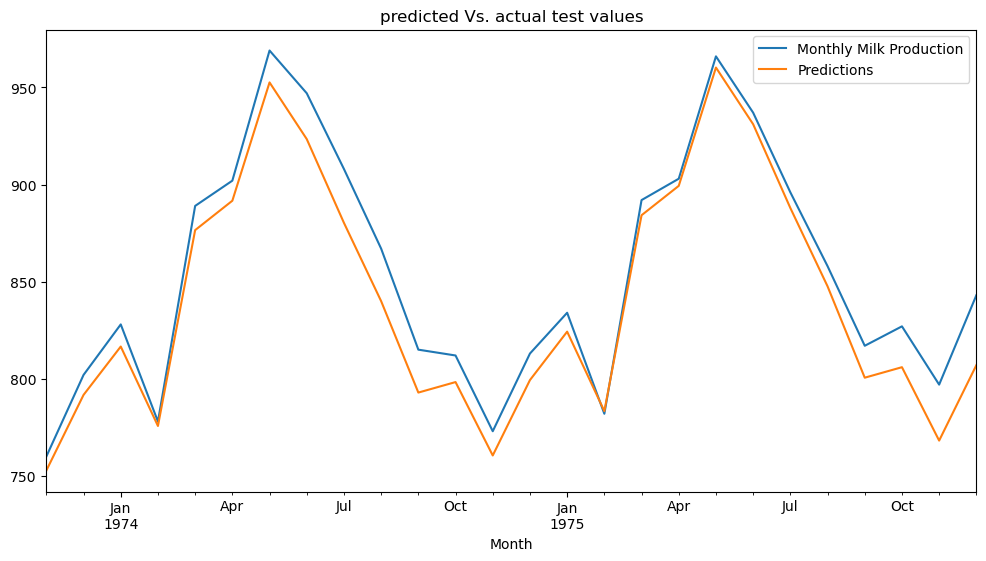

In [66]:

test['Monthly Milk Production'].plot(figsize = (12,6))
predictions.plot()
plt.title('predicted Vs. actual test values')
plt.legend()
plt.savefig(' predicted vs actual values.png')
plt.show()

In [67]:
#checking accuracy using following metrices
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
print('Evaluation Results for Test Data : \n')
print(' Percenatge of R2 Score : {} %'.format(100*(r2_score(test['Monthly Milk Production'],predictions))),'\n')
print(' Mean Squared Error',mean_squared_error(test['Monthly Milk Production'],predictions),'\n')
print(' Root Mean Squared Error',sqrt(mean_squared_error(test['Monthly Milk Production'],predictions)),'\n')
print(' Mean Absolute Error',mean_absolute_error(test['Monthly Milk Production'],predictions),'\n')
print(' Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(test['Monthly Milk Production'],predictions)),'\n')

Evaluation Results for Test Data : 

 Percenatge of R2 Score : 92.40433712932766 % 

 Mean Squared Error 274.9406359048584 

 Root Mean Squared Error 16.581333960356098 

 Mean Absolute Error 14.062888835628796 

 Mean Absolute Percentage Error : 1.65 % 



In [69]:
#using pickle alsso checking accuracy on the whole dataset
import pickle
pickle.dump(result,open('Best Model.pkl','wb'))
final_model = pickle.load(open('Best Model.pkl','rb'))
pred = final_model.predict(0, 167, typ = 'levels')
print('Evaluation Results for Whole Data : \n')
print(' Percenatge of R2 Score : {} %'.format(100*(r2_score(df['Monthly Milk Production'],pred))),'\n')
print(' Mean Squared Error',mean_squared_error(df['Monthly Milk Production'],pred),'\n')
print(' Root Mean Squared Error',sqrt(mean_squared_error(df['Monthly Milk Production'],pred)),'\n')
print(' Mean Absolute Error',mean_absolute_error(df['Monthly Milk Production'],pred),'\n')
print(' Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df['Monthly Milk Production'],pred)),'\n')

Evaluation Results for Whole Data : 

 Percenatge of R2 Score : 73.71069997172135 % 

 Mean Squared Error 2729.7724846141655 

 Root Mean Squared Error 52.24722465944163 

 Mean Absolute Error 14.24636104695002 

 Mean Absolute Percentage Error : 2.12 % 



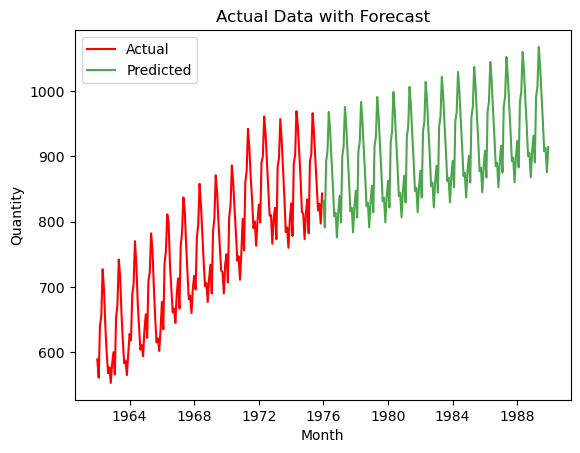

In [72]:
#our final forecast on the dataset 
forecast = result.predict(start = '1976-01-01', end = '1989-12-01')
plt.plot(df, color = 'red', label = 'Actual',alpha = 1)
plt.plot(forecast, color = 'green', label = 'Predicted', alpha = 0.7)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend()
plt.title('Actual Data with Forecast')
plt.savefig('Actual Data with Forecast .png')
plt.show()
